## Social Media Usage and Addiction

Name: Sumit Kumar Sangroula, Student ID: GH1040901

### Context

With the invention of technology, most of our day to day chores have been simplified to a certain extent. And it is obvious that we go with the flow regardless of the outcomes. We are now shifting more on digital screen rather than spending time to witness real-time events. We are slowly falling prey to the digital world which we have no control of. The development of different tools and apps across different platforms although with the intention of providing services to the people, the excessive use of these platforms have severe effects on the users.

The dataset used in this project will allow us to dissect the usage of social media platforms by students around the world and the effects it invoke on the sudents. The dataset used in this project gives an insight of how the usage of social media platforms affects the mental and academic performance of the students. The dataset contains features such as daily usage hours, addiction level, social media conflicts, relationship status, age, academic performance and more. We will analyze the academic growth of the students based on these features and draw out conclusions based on the output.

### Objective

1. Identify vulnerable gender and age groups.
2. Assess the social and academic behaviour of students.
3. Awareness of the negative impacts and proper guidance to mitigate the problems.

### Data Source 
The data is collected from https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships/data?select=Students+Social+Media+Addiction.csv
Also, I have uploaded the dataset on my github account. https://github.com/9sumit9/dataset/blob/main/Students%20Social%20Media%20Addiction.csv

* Dataset Name : Students' Social Media Addiction
* Format : CSV
* No. of Columns : 13
* No. of Records : 705


### Importing necessary libraries

In [1]:
import pandas as pa #data analysis library
import matplotlib.pyplot as pt #for visualization
import seaborn as sbn #for visualization
from sklearn.ensemble import RandomForestClassifier #supervised learning model
from sklearn.preprocessing import LabelEncoder #to convert categorical data into numerical
from sklearn.model_selection import train_test_split #to train, test and split the data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #evaluation metrics
import warnings #to ignore the future warnings while running the code.
warnings.filterwarnings("ignore", category=FutureWarning)


##### Importing the dataset from my github account.

In [2]:
#Loading the dataset from github
dataf = pa.read_csv('https://raw.githubusercontent.com/9sumit9/dataset/refs/heads/main/Students%20Social%20Media%20Addiction.csv')

### Data Exploration

In [3]:
dataf.head() #displays the data of the first five rows

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
dataf.info() #Provides a brief discription of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

##### Checking for Null values

In [5]:
dataf.isnull().sum() #Checking for null values and summing up the total no. of null values

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

The labels in our dataset doesn't contain any null values.

##### Checking for Duplicated values

In [6]:
dataf.duplicated().sum() #Checking for duplicated values.

np.int64(0)

##### Checking for NaN values

In [7]:
dataf.isna().sum() #The isna() functions checks for the NaN values and the sum() function sumps up the total NaNs.

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

All the labels in the dataset are free from NaNs.

### Explanatory Data Exploration

Since, the Student_ID column in the dataset doesn't have major role in the analysis, we will drop the Student_ID column.

In [8]:
dataf = dataf.drop('Student_ID', axis =1) #dropping the column Student_ID since it doesn't have any significane in our analysis.
dataf.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


##### Q1. On which social media platforms are the students most engaged? And the total no. of conflicts they are involved.

In [9]:
#Checking which platform is mostly used by the students
total_platform_user = dataf['Most_Used_Platform'].value_counts().rename('Total Users') #Gives the total no. of users for each platform

#Show the total no of conflicts incited in each social media platforms
total_conflicts = dataf.groupby('Most_Used_Platform')['Conflicts_Over_Social_Media'].sum().rename('Total Conflicts') #Sums up the total no. of conflicts for each social media platform

#Combining the total platform user and the conflict value counts for a better display
sm_platform_details = pa.concat([total_platform_user, total_conflicts], axis=1)

#Sorting in descending order
sm_platform_details = sm_platform_details.sort_values(by='Total Users', ascending=False)

#Print the output
print(sm_platform_details.to_string())


                    Total Users  Total Conflicts
Most_Used_Platform                              
Instagram                   249              732
TikTok                      154              525
Facebook                    123              299
WhatsApp                     54              187
Twitter                      30               73
LinkedIn                     21               19
WeChat                       15               38
Snapchat                     13               42
VKontakte                    12               24
LINE                         12               12
KakaoTalk                    12               36
YouTube                      10               22


The top 5 most used platforms have strong coorelation with conflicts faced by the students.i.e. higher the no. of users higher the rate of conflicts.

##### Q2. Finding the countries which have the high average daily usage based on the platform.

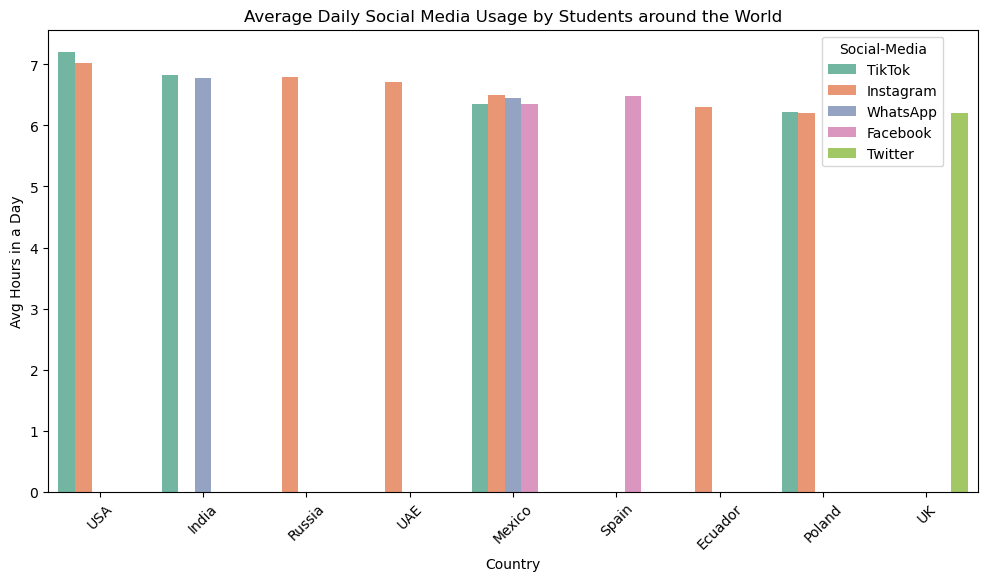

In [10]:
#Grouping on the basis of Country, Most_Used_Platform and Avg_Daily_Usage_Hours by computing the mean rounding off to 2 decimal places
platform_usage_bycountry = (
    dataf.groupby(['Country', 'Most_Used_Platform'])['Avg_Daily_Usage_Hours']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='Avg_Daily_Usage_Hours', ascending=False)
)

#Plotting the top 15 countries on the basis of usage hours
usage_hrs = platform_usage_bycountry.head(15)

pt.figure(figsize=(12, 6))
sbn.barplot(data=usage_hrs, x='Country', y='Avg_Daily_Usage_Hours', hue='Most_Used_Platform', palette='Set2')

pt.title('Average Daily Social Media Usage by Students around the World')
pt.ylabel('Avg Hours in a Day')
pt.xticks(rotation=45)

#Displaying legend at a suitable place
pt.legend(title='Social-Media', bbox_to_anchor=(0.97, 1), loc='upper right')

#Display the plot
pt.show()


The widely used social media platform among the students is Instagram followed by Tiktok. American students spend more time on Tiktok and Instagram with an average of 7 hours per day. While Indian students come second with the use of Tiktok and Whatsapp nearly making 7 hours per day. Also, Indian students seem to use WhatsApp more than other international students at more than 6.5 hours per day. Mexican students seem to use 4 different social media platforms more than 6 hours a day. It seems that Mexican students don't have any favourite platform. Meanwhile, the students from the UK tend to use Twitter more than any other social media platforms for an average of more than 6 hours per day. Overall, it is observed that students from the top 15 countries in terms of daily usage, spends more than 6 hours a day in different social media.

### Data Pre-processing

##### Converting categorical attributes into numerical attributes

We will only convert the columns that we need for further processing.

In [11]:
dataf['Gender'] = dataf['Gender'].map({'Male': 1, 'Female': 0}) #Converts Gender into numeric values 
dataf['Academic_Level'] = dataf['Academic_Level'].map({'Graduate': 2, 'Undergraduate': 1, 'High School': 0}) #Converts Academic_Level into numeric values
dataf['Affects_Academic_Performance'] = dataf['Affects_Academic_Performance'].map({'Yes': 1, 'No': 0}) #Converts Affects_Academic_Performance into numeric values
dataf['Relationship_Status'] = dataf['Relationship_Status'].map({'In Relationship': 2,  'Single': 1, 'Complicated': 0}) #Converts Relationship_Status into numeric values
dataf.head(5)

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,0,1,Bangladesh,5.2,Instagram,1,6.5,6,2,3,8
1,22,1,2,India,2.1,Twitter,0,7.5,8,1,0,3
2,20,0,1,USA,6.0,TikTok,1,5.0,5,0,4,9
3,18,1,0,UK,3.0,YouTube,0,7.0,7,1,1,4
4,21,1,2,Canada,4.5,Facebook,1,6.0,6,2,2,7


Now, we will plot a heatmap to check the correlation of the numerical data.

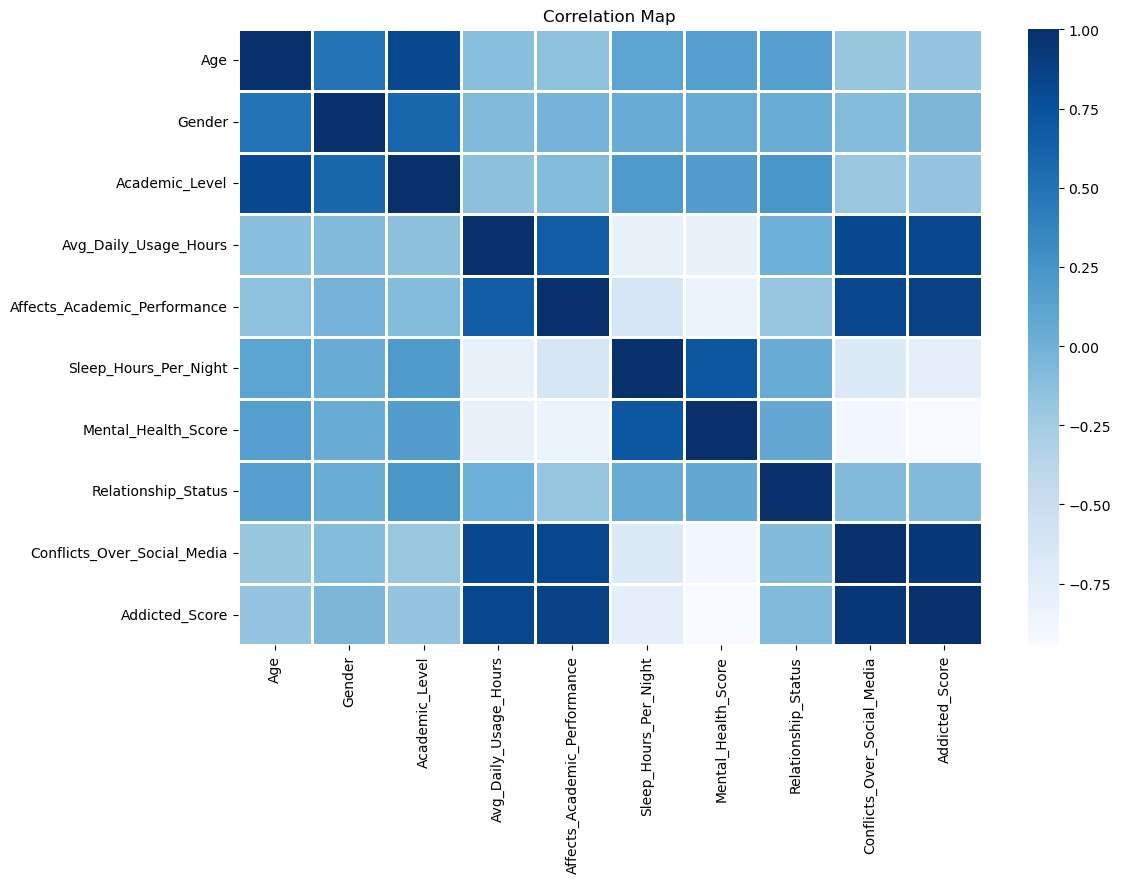

In [12]:
#For correlation, we will select only the numerical attributes.
num_cols = dataf.select_dtypes(include=['number'])

#Computing the correlation matrix
c_mat = num_cols.corr()

#Plotting the correlation heatmap
pt.figure(figsize=(12, 8))
sbn.heatmap(c_mat, cmap='Blues', linewidths=1, fmt='.3f')
pt.title('Correlation Map')
pt.show()

We can observe that the labels 'Avg_Daily_Usage_Hours', 'Affects_Academic_Performance', 'Conflicts_Over_Social_Media' and 'Addicted_Score' are positively correlated. Whenever the value of a label increases, the value of other labels also increase. Whenever a student spend more time on social media, it is seen that his/her social conflicts engagement rises and affects the academic performance. As a result, the addicted score also rises.    These labels however have inverse correlation with 'Mental_Health_Score' and 'Sleep_Hours_per_Night'.

### Feature Engineering

##### Assigning age groups to the ages.

The dataset consists of 705 entries of students with different ages. So, for a better analysis and evaluation, we will label the ages categorically which will allow us to make specific age group based conclusion.

In [13]:
#Defining a function ag_gp which will show which group a particular age will fall.
def age_gp(age):
    if age <= 12:
        return 'Child'
    elif age <= 19:
        return 'Teenager'
    elif age <= 25:
        return 'Young Adult'
    else:
        return 'Adult'
        
dataf['Age_Group'] = dataf['Age'].apply(age_gp) #Creating a new column Age_Group

#Counting the number of students in each age group
age_gpcts = dataf['Age_Group'].value_counts().sort_index() #Finding the total no. of users group-wise. 

print(age_gpcts)


Age_Group
Teenager       177
Young Adult    528
Name: count, dtype: int64


In [14]:
dataf.head(5) #Now a new feature with Age_Group is created at the end.

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Age_Group
0,19,0,1,Bangladesh,5.2,Instagram,1,6.5,6,2,3,8,Teenager
1,22,1,2,India,2.1,Twitter,0,7.5,8,1,0,3,Young Adult
2,20,0,1,USA,6.0,TikTok,1,5.0,5,0,4,9,Young Adult
3,18,1,0,UK,3.0,YouTube,0,7.0,7,1,1,4,Teenager
4,21,1,2,Canada,4.5,Facebook,1,6.0,6,2,2,7,Young Adult


##### Q4. Analysing which age-group and gender is addicted to social media more.

In [42]:
#Defining a function to get the most used platform
def top_sm_platform(series):
    return series.mode().iloc[0] if not series.mode().empty else None

#Grouping Age_Group and Gender and calculating the mean values Avg_Daily_Usage_Hours, Sleep_Hours_Per_Night since we need mean values of these features.
gp_stats = dataf.groupby(['Age_Group', 'Gender'])[['Avg_Daily_Usage_Hours', 'Addicted_Score']].mean().round(2) #taking the mean values for the labels

#Grouping Age_Group and Gender and using the agg function to calculate the counts of Most_Used_Platform
platform_mode = dataf.groupby(['Age_Group', 'Gender'])['Most_Used_Platform'].agg(top_sm_platform)  

gp_stats['Most_Used_Platform'] = platform_mode

#Sorting the values by Avg_Daily_Usage_Hours and reindexing
sorted_stats = gp_stats.sort_values(by='Avg_Daily_Usage_Hours', ascending=False).reset_index()

print(sorted_stats.to_string(index=False))

  Age_Group  Gender  Avg_Daily_Usage_Hours  Addicted_Score Most_Used_Platform
   Teenager       0                   5.16            6.68          Instagram
   Teenager       1                   5.07            6.97             TikTok
Young Adult       0                   4.91            6.41          Instagram
Young Adult       1                   4.80            6.29           Facebook


From the output above, on a daily basis, teenagers tend to use social media more than young adults. On the contrary, female tend to spend more time on social media. It is also clear that female are addicted to using Instagram while male prefer Tiktok and Facebook. Female teenagers have comparatively low 'Addicted_Score' than male teenagers although they have higher usage hours. For young adults, we see direct relation, higher the usage hours higher the 'Addicted_Score'.

##### Q3. How many students are in need of immediate therapy or care? What are the average usage hours for each addiction score?

In [48]:
#Counting the total for each Addicted_score
total_addicted = dataf['Addicted_Score'].value_counts().reset_index()
total_addicted.columns = ['Addiction Score', 'Total Students']

#Defining function to map the score label from numerical to categorical
def label_score(score):
    if score <= 3:
        return 'Low'
    elif score <= 5:
        return 'Moderate'
    elif score <= 7:
        return 'High'
    elif score >7:
        return 'Extreme'

#Adding Addiction Level column that will store the categorical value of the addicted score
total_addicted['Addiction Level'] = total_addicted['Addiction Score'].apply(label_score)

#Printing the result.
print("Total number of students with their addiction score and level:\n")
print(total_addicted)


Total number of students with their addiction score and level:

   Addiction Score  Total Students Addiction Level
0                7             209            High
1                8             144         Extreme
2                5             136        Moderate
3                4              83        Moderate
4                6              61            High
5                9              55         Extreme
6                3              16             Low
7                2               1             Low


209 students have an addiction score of 7. 144 students have the addiction score 8. Meanwhile, 55 students have the highest addiction score. Only one student has the addiction score of 2 keeping away from conflicts with a healthy lifestyle. Now, let us find how many students need immediate support and guidance to stay away from social media platforms and improve their social well-being and academic performance as well.

In [50]:
total_students = total_addicted['Total Students'].sum()

#Calculating total number of students with High or Extreme addiction levels
high_extreme_level = total_addicted[total_addicted['Addiction Level'].isin(['High', 'Extreme'])]
total_high_extreme_level  = high_extreme_level ['Total Students'].sum()

#Displaying the results
print(f"Total number of students: {total_students}")
print(f"Students with High or Extreme addiction: {total_high_extreme}")


Total number of students: 705
Students with High or Extreme addiction: 469


From the output above, we can see that 469(more than half of the total students) students have strong addiction to the use of social media usage. We will calculate the average daily usage hours for each addiction score below.

In [52]:
#Calculating the mean daily usage hours of the students
mean_daily_usage_hours = dataf.groupby('Addicted_Score', as_index=False)['Avg_Daily_Usage_Hours'].mean().round(2)
mean_daily_usage_hours.columns = ['Addicted_Score', 'Average_Usage_Hours']
print(mean_daily_usage_hours)

   Addicted_Score  Average_Usage_Hours
0               2                 1.50
1               3                 2.98
2               4                 3.26
3               5                 4.18
4               6                 4.40
5               7                 5.10
6               8                 5.97
7               9                 7.01


From the analysis, students with high and extreme addiction score tend to spend more than 5 hours a day in social media attracting more conflicts and degrading their academic growth, thus affecting their social lifestyle.

##### Q5. Does the student's lifestyle affect the mental health and academic performance?

In [16]:
#Listing the labels that relates to lifestyle
lifestyle = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score','Affects_Academic_Performance' ]
lifestyle_matrix = dataf[lifestyle].corr() #Finding correlation between the labels
lifestyle_matrix #printing the correlation output 

,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Affects_Academic_Performance
Avg_Daily_Usage_Hours,1.000000,-0.790582,-0.801058,0.661474
Sleep_Hours_Per_Night,-0.790582,1.000000,0.707439,-0.625373
Mental_Health_Score,-0.801058,0.707439,1.000000,-0.808921
Affects_Academic_Performance,0.661474,-0.625373,-0.808921,1.000000


From the output above, it is clear that the lifestyle of the students directly affect their mental health and academic performance.
The mental health of the students is inversely correlated to daily usage hours.
* spending more time on social media leads to weak mental health
* addiction and conflicts may be the significance factors to weaken the mental health


Academic performance has moderate positive relation to daily usage hours.
* students may lose focus on the study and eventually affect their academic performance

  
Sleep hours have strong correlation with mental health
* students with more sleeping hours have robust mental health
* less amount of sleep affect the academic performance
Decrease in academic performance is the direct cause of mental health.

To improve the academic performance and maintain a good mental health, students should be advised to minimize the use of social media and avoid social media conflicts.

##### Q6. How is the Academic Performance of the students related to Average Daily Usage Hours?

We will create an hour group for the Avg_Daily_Usage_Hours. Based on that hour group we will calculate the total no. of students whose academic performance have been affected. 

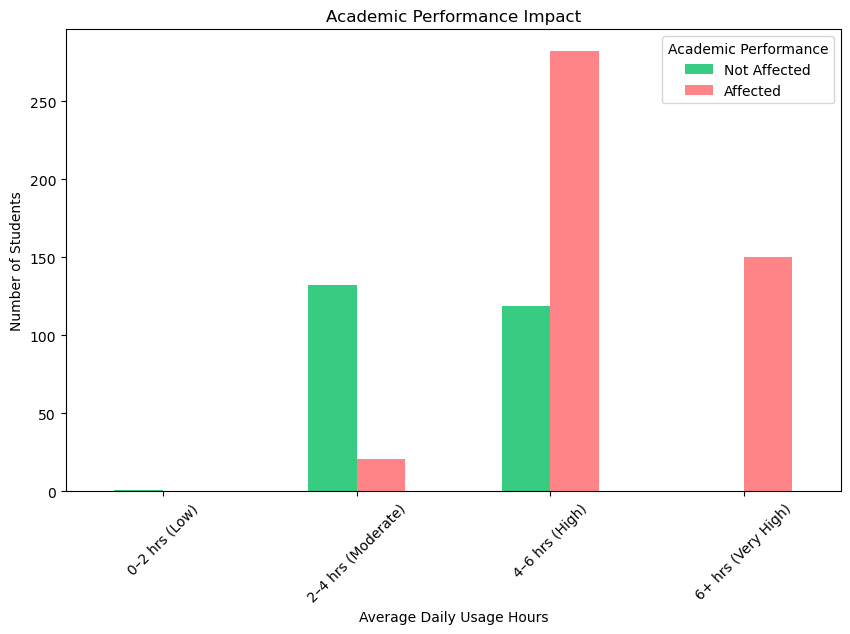

In [53]:
#Creating an hour group
hours_bins = [0, 2, 4, 6, float('inf')] #float('inf') refers to infinite positive number
hours_labels = ['0–2 hrs (Low)', '2–4 hrs (Moderate)', '4–6 hrs (High)', '6+ hrs (Very High)'] #labeling hours

#Creating a new label which will replace the avg hours by hour group
dataf['Hours_Usage_Group'] = pa.cut(dataf['Avg_Daily_Usage_Hours'], bins = hours_bins, labels= hours_labels, right = False)

#Grouping by Hours_Usage_Group and Affects_Academic_Performance 
grouped = dataf.groupby(['Hours_Usage_Group', 'Affects_Academic_Performance']).size().unstack()
grouped.columns = ['Not Affected', 'Affected']

#Plotting the graph
grouped.plot(kind='bar', figsize=(10, 6), color=['#38cb82', '#FF8488'])
pt.title('Academic Performance Impact')
pt.xlabel('Average Daily Usage Hours')
pt.ylabel('Number of Students')
pt.xticks(rotation=45)
pt.legend(title='Academic Performance')
pt.show()

The academic performance of around 150 students are highly affected since they spend more than 6 hours on different social media platforms. More than 400 students use social media platforms for 4-6 hours. This usage period has the highest no. of students (more than 2501) whose academic performance are affected. The  no. of affected ones in the lowest hour group is 0. Conclusively, the decline in academic performance increases with the increase in the duration of the usage of social media platforms.

#### Determing the most influenced feature for 'Affects_Academic_Performance'.

In [20]:
#Preparing data for train and test
X = dataf.drop(columns=['Affects_Academic_Performance'])
y = dataf['Affects_Academic_Performance']

#Converting all the categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        X[col] = label_encoder.fit_transform(X[col])

In [21]:
dataf['Affects_Academic_Performance'].value_counts()

Affects_Academic_Performance
1    453
0    252
Name: count, dtype: int64

Since the counts for Affected are almost twice of Not Affected, we will use stratify parameter while splitting the data. Stratify is used to ensure the ratio of train and test dataset by representing the whole dataset.

In [23]:
#Splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y) #stratify = y , to ensure class balance.

 We will use RandomForestClasifier since it provides the best result to determine feature importance.

In [24]:
#Using RandomForestClassifier model to train the data
mod1 = RandomForestClassifier(random_state=42)
mod1.fit(X, y)

RandomForestClassifier(random_state=42)

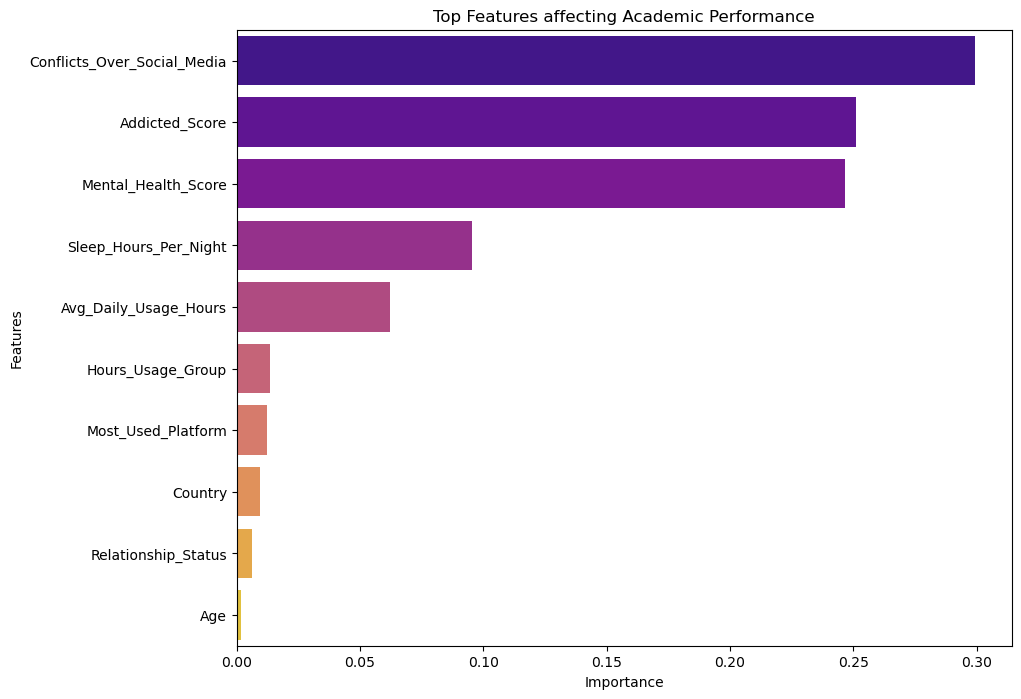

In [25]:
#Determing the most influencing features
feat_imp = mod1.feature_importances_
feat_imp = pa.DataFrame({'Features': X.columns, 'Importance': feat_imp})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

#Plotting the graph
pt.figure(figsize=(10, 8))
sbn.barplot(x='Importance', y='Features', data=feat_imp.head(10), palette='plasma')
pt.title("Top Features affecting Academic Performance")
pt.show()

We already knew from the heatmap that 'Avg_Daily_Usage_Hours' has strong positive correlation with 'Affects_Academic_Performance', 'Conflicts_Over_Social_Media' and 'Addicted_Score' labels. Now, from the bar graph above it is clear that with the increase in the value of 'Avg_Daily_Usage_Hours', the values of 'Conflicts_Over_Social_Media' label rises and this rise ultimately is the prime factor for the decrement in the Academic Performance of the students.

#### Evaluating the metrics for RandomForestClassifier

In [26]:
#Making Predictions on the basis of 'Affected' and 'Not Affected'
y_preds = mod1.predict(X_test)

#Printing the evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_preds, target_names=['Not Affected', 'Affected']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_preds))

print(f"Accuracy Score: {accuracy_score(y_test, y_preds):.2f}")


Classification Report:
              precision    recall  f1-score   support

Not Affected       1.00      1.00      1.00        50
    Affected       1.00      1.00      1.00        91

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141

Confusion Matrix:
[[50  0]
 [ 0 91]]
Accuracy Score: 1.00


Overall, we achieved a cent percent accuracy during preditions. Moreover, the evaluation matrix shows that the model correctly identified True Negatives(50), True Positive (91),  zero False Positives and False Negatives. This shows that our model worked perfectly in determining whether the academic performance of the students are truly affected by 'Avg_Daily_Usage_Hours'. But, a cent percent accuracy is normally not attainable. This could be due to one of the followings:
* simple and small dataset
* dataleaks
* data overfitting

#### Conclusion

Social Media :
* Students use Instagram and TikTok the most
* More than half of the students are in the critical state of addiction with more than 5 hours of daily usage.
* Female students use the platforms more than their male counterparts; teenagers being the most.

Academic and Social Life
* With the increase in social media, the lifestyle and academic performance of the students are hampered.
* Daily usage hours, addiction score and mental health are inversely correlated.
* Relationship status doesn't play any major facto for addiction.

Feature Analysis using RandomForestClassifier
* The most important feature that affects the academic growth is Social Media Conflicts which is directly related to daily usage.

Recommendations and Guidance
* Set a daily usage hour for the platform and prioritize more time for healthy sleeping habits and studies. Less than 5 hours for social media usage.
* Develop awareness programs to lower down the social media addiction by balancing the time for social media usage, social activities and well-being.
* Academic institutions must guide and aware their students by initiating social media literacy to help the students stay away from social media usage and conflicts emphasizing  more on their academic growth.

Future Learnings
* New predictive models should be developed to study the digital well-being and social well-being of the students, identify the risks associated with them and develop counter measures to overcome the risks.
* Research and identify the behavioral patterns of the students from a large dataset and use these patterns to further analyse the addiction levels and academic growth of the students and try to mitigate the risks as early as possible to safeguard the lives of the students.